In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.10/ (Recommended version – 3.10).
# The Python Tutorial (python3.10): https://docs.python.org/3.10//tutorial/index.html

# Load Modules ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
#       About: https://matplotlib.org/
#       Using Matplotlib (user guide): https://matplotlib.org/stable/users/index
#       Plot types: https://matplotlib.org/stable/plot_types/index
#       Tutorials: https://matplotlib.org/stable/tutorials/index
#       Examples: https://matplotlib.org/stable/gallery/index
#       API Reference: https://matplotlib.org/stable/api/index

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.23.5
pandas version:  1.5.3
seaborn version: 0.12.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html) - [Ordinary Least Squares (OLS) Method](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

Equation of line -
`y = mx + c`

![mass-luminosity.gif](https://www.astronomynotes.com/starprop/mass-luminosity.gif)

Source: https://www.astronomynotes.com/starsun/s8.htm

## On Sample Data

### Generate and Plot Data

In [ ]:
# generate random values between 0 and 1
X=np.random.uniform(low=0,high=1,size=50)
X.sort()                              # sort array (update orignal array)
# random slope (m) and intercept (c)
m,c=np.tan(np.deg2rad(45)),np.random.randn()# generate random number from "standard normal" distribution
# same as np.random.noraml(loc=0,scale=1) or np.random.randn()
# calculate y (outputs)
y=m*X+c
# add noise to data (random noise)
y_noisy=y+np.random.normal(loc=0,scale=0.025,size=y.size)

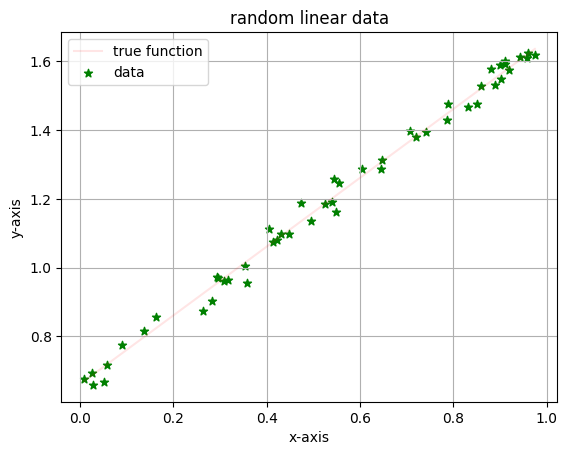

In [ ]:
# plot randomly generated linear data
plt.plot(X,y,color='r',alpha=0.1,label='true function')
plt.scatter(X,y_noisy,color='g',marker='*',label='data')
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('random linear data')
plt.legend()                          # show labels
plt.show()                            # make show plot

### Make model - **[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** model

In [ ]:
# load model - Linear Regression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression# linear regression class

# built model (make object)
lReg=LinearRegression()
# train model (means predict slope and intecept optimum value)
lReg.fit(X.reshape(-1,1),y_noisy)# minimize SSE (sum square error) to get coefficient (slope) and intecept optimum value)
# see calculated value of coefficient of X
print('Coefficient (slope):  calculated:',lReg.coef_,'; orginal:',m)
print('Intercept (c):  calculated:',lReg.intercept_,'; orginal:',c)

Coefficient (slope):  calculated: [1.00867658] ; orginal: 0.9999999999999999
Intercept (c):  calculated: 0.656210587461225 ; orginal: 0.6613245366511881


### Evaluate Model

In [ ]:
# predict value of outputs "y"
y_predict=lReg.predict(X.reshape(-1,1))
# store results as pandas dataframe
results=pd.DataFrame(data={'y-true':y,'y-noisy':y_noisy,'y-predicted':y_predict})
# add difference
results['difference']=results['y-noisy']-results['y-predicted']
# see head
results.head()

,y-true,y-noisy,y-predicted,difference
0,0.669358,0.676752,0.664314,0.012438
1,0.686886,0.694558,0.681994,0.012565
2,0.689211,0.658977,0.684339,-0.025362
3,0.711941,0.666611,0.707266,-0.040655
4,0.719050,0.716923,0.714437,0.002486


In [ ]:
# see tail
results.tail()

,y-true,y-noisy,y-predicted,difference
45,1.581391,1.575472,1.584260,-0.008787
46,1.605297,1.612358,1.608373,0.003985
47,1.618230,1.611112,1.621419,-0.010307
48,1.621466,1.623951,1.624683,-0.000732
49,1.636121,1.619883,1.639465,-0.019582


### Plot Results

In [ ]:
# add mean squared error (MSE) - sigma((y_true-y_predicted)^2)/total_points
# Mean squared error (MSE) Source: https://en.wikipedia.org/wiki/Mean_squared_error
mse=np.mean(np.sum(np.square(results['y-noisy']-results['y-predicted'])))
# add mean absolute error (MAE) - sigma(|y_true-y_predicted|)/total_points
# Mean absolute error (MEA) source: https://en.wikipedia.org/wiki/Mean_absolute_error
mae=np.mean(np.sum(np.abs(results['y-noisy']-results['y-predicted'])))
# see error
print('MAE:',mae)
print('MSE:',mse)
# calculate R2 score (1-SSE/SST)
print('Model score:',lReg.score(X.reshape(-1,1),y_noisy))

MAE: 1.0687550323885664
MSE: 0.035239981252224516
Model score: 0.9922817988310146


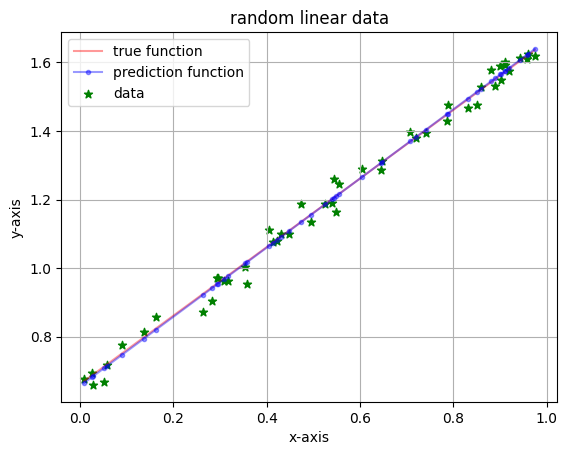

In [ ]:
# plot randomly generated linear data
plt.plot(X,y,color='r',alpha=0.4,label='true function')
plt.plot(X,y_predict,color='b',alpha=0.4,marker='.',label='prediction function')
plt.scatter(X,y_noisy,color='g',marker='*',label='data')
plt.grid(),plt.xlabel('x-axis'),plt.ylabel('y-axis'),plt.title('random linear data')
plt.legend()                          # show labels
plt.show()                            # make show plot

## On sample dataset (Salary-Prediciton-based-on-Years-of-Experience)

### load and analysis dataset

In [2]:
# Source: https://drive.google.com/file/d/1m7jitaPwGHIjiuyayWiiGJgHRaZd3mIn/view?usp=drive_link
!gdown "1m7jitaPwGHIjiuyayWiiGJgHRaZd3mIn"

Downloading...
From: https://drive.google.com/uc?id=1m7jitaPwGHIjiuyayWiiGJgHRaZd3mIn
To: /content/salary_data.csv
100% 400/400 [00:00<00:00, 1.33MB/s]


In [3]:
data=pd.read_csv('salary_data.csv',sep=',')                                     # load data
data.head()                                                                     # head of data

,1.1,39343.00
0,1.3,46205.0
1,1.5,37731.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


In [ ]:
data.tail()                                                                     # tail of data

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [ ]:
# see shape of data
data.shape

(30, 2)

In [ ]:
# see column names
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
# see data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
# see null value counts (numerical)
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### plot data

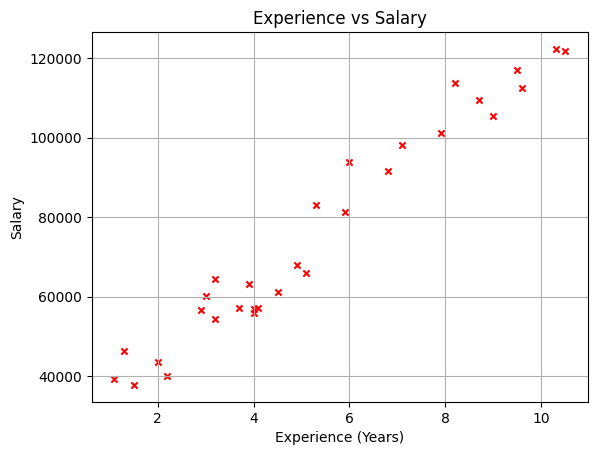

In [ ]:
data.plot.scatter(x='YearsExperience',y='Salary',marker='x',color='r')          # or, plot using pandas
#plt.scatter(data['YearsExperience'],data['Salary'],marker='x',color='r')       # plot using pyplot
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary')                                               # add plot title
plt.show()                                                                      # make show plot

### make apply Linear Regression Manually

In [ ]:
# As, linear regression equation -> y = m * X + c ; where , y -> Salary, x -> YearsExperience, m -> slope (coef_), c -> intercept
# So, Salary = m * YearsExperience + c
# m = covariance / variances ; where , variances = (X - x_mean)^2 , and covariance = (X - x_mean) * (y - y_mean)
# c = y_mean - m * x_mean
# make calculate variances for inputs - X
data['YearsExperience-variances']=np.square(data['YearsExperience']-data['YearsExperience'].mean())# calculate variances - (X - x_mean)^2
# covariance = (X - x_mean) * (y - y_mean)
data['covariance']=np.multiply(data['YearsExperience']-data['YearsExperience'].mean(),data['Salary']-data['Salary'].mean())# calculate covariance
coefficient=np.sum(data['covariance'])/np.sum(data['YearsExperience-variances'])# calculate slope (m) / coefficient
intercept=data['Salary'].mean()-coefficient*data['YearsExperience'].mean()      # calculate intercept
# make manual prediction - y_predicted = m * YearsExperience + c
data['y_predicted_manually']=coefficient*data['YearsExperience']+intercept      # make manual prediction

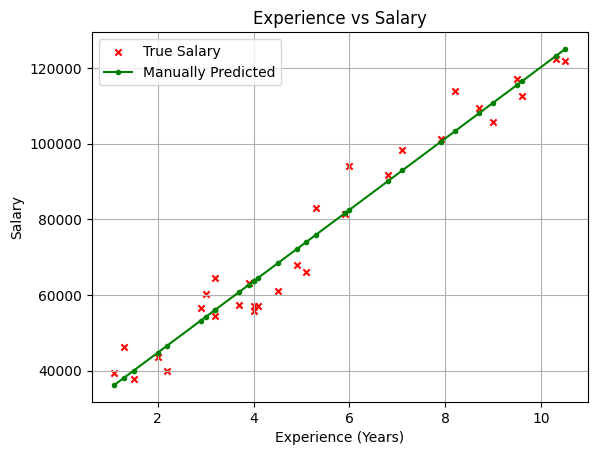

In [ ]:
# make plot results
ax=data.plot.scatter(x='YearsExperience',y='Salary',marker='x',color='r')       # make plot true value
data.plot(x='YearsExperience',y='y_predicted_manually',marker='.',color='g',ax=ax)# make plot predicted values
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary'),plt.legend(['True Salary','Manually Predicted'])# add plot title and legend
plt.show()                                                                      # make plot show

### make apply Linear Regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression                               # load LinearRegression class

lReg=LinearRegression()                                                         # make model (object) of linear regression class
# As, linear regression equation -> y = m * X + c ; where , y -> Salary, x -> YearsExperience, m -> slope (coef_), c -> intercept
# So, Salary = m * YearsExperience + c
# make model train (calaculate features) - find value of m and c
#lReg.fit(data['YearsExperience'].values.reshape(-1,1),data['Salary'])           # make fit data - Xtrain and ytrain # or
lReg.fit(data[['YearsExperience']],data['Salary'])                              # make fit data
# print m and c
print('Slope:',lReg.coef_)                                                      # predicted slope / coefficient
print('Intercept:',lReg.intercept_)                                             # predicted intercept

Slope: [9449.96232146]
Intercept: 25792.200198668696


In [ ]:
# compair slope / coefficient and intercept (by sklearn.linear_model.LinearRegression) with manually predicted slope / coefficient and intercept
print('Slope (by sklearn.linear_model.LinearRegression)    :',lReg.coef_)       # predicted slope / coefficient (by by sklearn.linear_model.LinearRegression)
print('Intercept (by sklearn.linear_model.LinearRegression):',lReg.intercept_)  # predicted intercept (by by sklearn.linear_model.LinearRegression)
print('Slope (manually)                                    :',coefficient)      # predicted slope / coefficient (by by sklearn.linear_model.LinearRegression)
print('Intercept (manually)                                :',intercept)        # predicted intercept (by by sklearn.linear_model.LinearRegression)
print('Difference (in slope)                               :',lReg.coef_[0]-coefficient)# difference between coefficients
print('Difference (in intercept)                           :',lReg.intercept_-intercept)# difference between intercepts

Slope (by sklearn.linear_model.LinearRegression)    : [9449.96232146]
Intercept (by sklearn.linear_model.LinearRegression): 25792.200198668696
Slope (manually)                                    : 9449.962321455077
Intercept (manually)                                : 25792.20019866869
Difference (in slope)                               : -1.8189894035458565e-12
Difference (in intercept)                           : 7.275957614183426e-12


In [ ]:
# make prediction for y (y-predict) by built-in method
data['y_predicted']=lReg.predict(data[['YearsExperience']])                     # make prediction - by built-in method
# as `lReg.predict` do nothing new , just -> Salary = m * YearsExperience + c ; to prove this calculate manually y_predicted
y_predicted_manually=lReg.coef_*data['YearsExperience']+lReg.intercept_         # manually predict y
# so, as `lReg.predict` uses y = m * X + c ; thus, `y_predicted` must be equal to `y_predicted_manually` , make check
print('All same:',np.allclose(y_predicted_manually,data['y_predicted']))        # np.allclose -> Returns True if two arrays are element-wise
# equal within a tolerance. The tolerance values are positive, typically very small numbers.

All same: True


In [ ]:
# Is prediction by sklearn.linear_model.LinearRegression and by manual (total) calculation
print('All same:',np.allclose(data['y_predicted_manually'],data['y_predicted']))# np.allclose -> Returns True if two arrays are element-wise
# equal within a tolerance. The tolerance values are positive, typically very small numbers.

All same: True


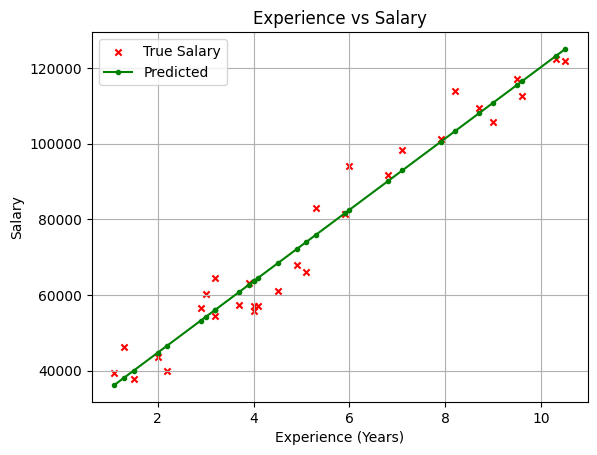

In [ ]:
# make plot results
ax=data.plot.scatter(x='YearsExperience',y='Salary',marker='x',color='r')       # make plot true value
data.plot(x='YearsExperience',y='y_predicted',marker='.',color='g',ax=ax)       # make plot predicted values
plt.grid(),plt.xlabel('Experience (Years)'),plt.ylabel('Salary')                # add grid and axis labels
plt.title('Experience vs Salary'),plt.legend(['True Salary','Predicted'])       # add plot title and legend
plt.show()                                                                      # make plot show

### Evaluate model results


* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)

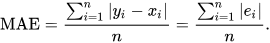

It is thus an arithmetic average of the absolute errors |`e`<sub>i</sub>| = |y<sub>i</sub> - x<sub>i</sub>| is the prediction and the true value.

* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)

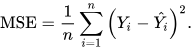

In other words, the MSE is the mean image.png of the squares of the errors 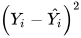 . This is an easily computable quantity for a particular sample (and hence is sample-dependent).

In [ ]:
data.head()                                                                     # see final results

,YearsExperience,Salary,YearsExperience-variances,covariance,y_predicted_manually,y_predicted
0,1.1,39343.0,17.752178,154460.800000,36187.158752,36187.158752
1,1.3,46205.0,16.106844,119589.306667,38077.151217,38077.151217
2,1.5,37731.0,14.541511,145943.893333,39967.143681,39967.143681
3,2.0,43525.0,10.978178,107610.440000,44692.124842,44692.124842
4,2.2,39891.0,9.692844,112428.693333,46582.117306,46582.117306


In [ ]:
data.tail()                                                                     # see tail of data

,YearsExperience,Salary,YearsExperience-variances,covariance,y_predicted_manually,y_predicted
25,9.0,105582.0,13.591511,109047.913333,110841.861092,110841.861092
26,9.5,116969.0,17.528178,171510.986667,115566.842252,115566.842252
27,9.6,112635.0,18.375511,157029.173333,116511.838485,116511.838485
28,10.3,122391.0,24.866844,231321.493333,123126.812110,123126.812110
29,10.5,121872.0,26.901511,237907.213333,125016.804574,125016.804574


In [ ]:
# calculate absolute error (difference)
data['absolute_error']=np.abs(data['Salary']-data['y_predicted'])               # absolute error = |y_true - y_predicted|
# calculate squared error (difference)
data['squared_error']=np.square(data['Salary']-data['y_predicted'])             # squared error = (y_true - y_predicted)^2
# make calculate and print mean absolute error and mean squared error
print('Mean Absolute Error (MAE):',data['absolute_error'].mean())               # print mean absolute error
print('Mean Squared Error (MAE):',data['squared_error'].mean())                 # print mean squared error

Mean Absolute Error (MAE): 4644.2012894435375
Mean Squared Error (MAE): 31270951.722280964


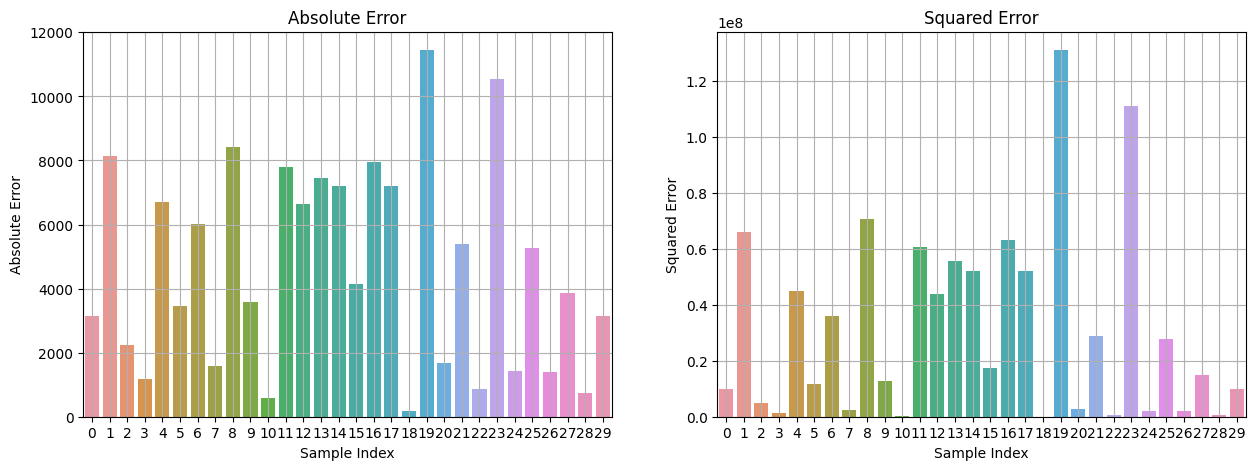

In [ ]:
plt.figure(figsize=(15,5))                                                      # make plot figure and set figure size - 15 inches along x axis and 5 along y axis
plt.subplot(1,2,1)                                                              # make subplot - 1 row, 2 columns and index -> 1
sns.barplot(data=data,x=data.index,y='absolute_error')                          # make plot absolute error sample wise
plt.grid(),plt.xlabel('Sample Index'),plt.ylabel('Absolute Error')              # add grid and axis labels
plt.title('Absolute Error')                                                     # add title to plot
plt.subplot(1,2,2)                                                              # make subplot - 1 row, 2 columns and index -> 2
sns.barplot(data=data,x=data.index,y='squared_error')                           # make plot squared error sample wise
plt.grid(),plt.xlabel('Sample Index'),plt.ylabel('Squared Error')               # add grid and axis labels
plt.title('Squared Error')                                                      # add title to plot
plt.show()                                                                      # make plot show

# What More ?

* [Underfitting vs. Overfitting ?](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
* More on [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html) - Regularization (penalty) - [Ridge Regression and Classification](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification), and [Lasso Regression](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

# References

* [The Python Tutorial](https://docs.python.org/3.10/tutorial/index.html)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [Matplotlib's Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
* [Pyplot - image tutorial](https://matplotlib.org/stable/tutorials/images.html#sphx-glr-tutorials-images-py)
* [Matplotlib - All Tutorials](https://matplotlib.org/stable/tutorials/index.html)
* [User guide and tutorial](https://seaborn.pydata.org/tutorial.html)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [10 Minutes to Pandas (Pandas, official tutorial)](https://pandas.pydata.org/docs/user_guide/10min.html)
* [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)